# Sieci neuronowe 1 - LAB

    prowadzący: Monika Wasilewska
    Politechnika Wrocławska, Katedra Akustyki, Multimediów i Przetwarzania Sygnałów
    

Run a cell via `Shift + Return`. Learn more about [CoCalc Jupyter Notebooks](https://doc.cocalc.com/jupyter.html).

---
Plan zajęć:
---

1. Wczytywanie i wyświetlanie obrazów.
2. Wstępne przetwarzanie i analiza:
    - analiza histogramów, 
    - obrót obrazu,
    - normalizacja,
    - wyrównanie histogramu,
    - różne metody przejścia do skali szarości.|
3. Wczytanie bazy danych. Obsługa danych wejściowych oraz etykiet.
4. Analiza struktury bazy oraz etykiet.
5. Wektoryzacja danych.
6. Kodowanie "one-hot", konwersja etykiet.
7. Inne typy daych - wczytanie dodatkowej bazy. Analiza wartości, normalizacja.
---

## Zadanie 1

Wczytaj obrazek dołączony do katalogu Lab_1, a następnie go wyświetl, wykorzystaj do tego metodę `imread()` oraz `imshow()`. Sprawdź jgo rozmiar. 

height:566, width:424, number of channels: 3


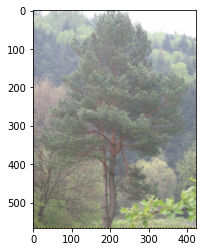

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('drzewo.png')
plt.imshow(img)

[h,w,d] = np.shape(img)
print(f'height:{h}, width:{w}, number of channels: {d}')

Rozmiar obrazka to: `566 x 424 x 3`, co oznacza:  `wysokość x szerokość x liczba kanałów`

# Zadanie 2
Nasz obrazek ma 3 kanały. Każdy z nich odpowiada za jedną ze składowych. Korzystając z `subplot` z pakietu `matplotlib` wyrysuj każdą ze składowych oddzielnie.
Opcja: wybierz odpowiednią paletę barw do każdego z nich.

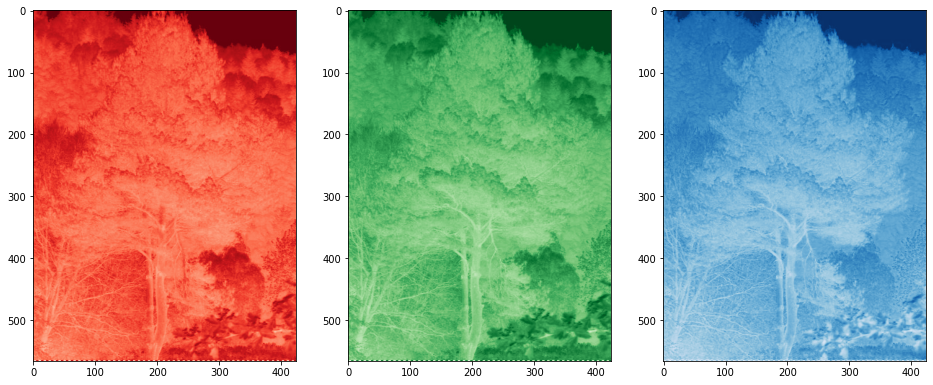

In [2]:
r,g,b = img[:,:,0], img[:,:,1], img[:,:,2]

plt.figure(figsize=(16,12))
plt.subplot(1, 3, 1)
plt.imshow(r, cmap='Reds')
plt.subplot(1, 3, 2)
plt.imshow(g, cmap='Greens')
plt.subplot(1, 3, 3)
plt.imshow(b, cmap='Blues')

## Zadanie 3

Napisz dwie funkcje, które pozwolą na przeniesienie kolorowego obrazka do sklai szarości. W pierwszej niech każdy kolor będzie równie istotny, w drugiej proporcje niech wynoszą: $x = 0.299R + 0.587G + 0.114B$. Przetestuj na wcześniej wczytanym obrazku, wyświetl rezultaty i porównaj efekt. 

In [3]:
# Convert rgb to grayscale
def rgb2gray(img):
    r,g,b = img[:,:,0], img[:,:,1], img[:,:,2]
    g = (r + g + b)/3
    return g

def rgb2gray2(img):
    r,g,b = img[:,:,0], img[:,:,1], img[:,:,2]
    g = (0.299*r + 0.587*g + 0.114*b)
    return g

def rgb2gray3(img):
    return np.dot(img[...,:3], [0.299, 0.587, 0.114])

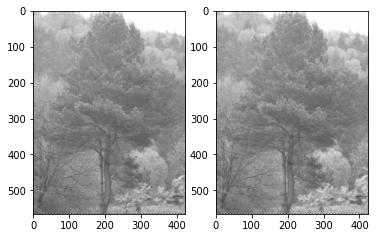

In [4]:
plt.subplot(1, 2, 1)
plt.imshow(rgb2gray(img), cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(rgb2gray2(img), cmap="gray")

bwimg = rgb2gray3(img)

## Zadanie 4

Napisz funkcję, która pozwoli na normalizację przekazanego obrazka. Przetestuj ją na wczytanym obrazku oraz tym w skali szarości.

In [5]:
# Apply linear normalization to image
def linear_norm(img):
    img = img - np.min(img)
    img = img / np.max(img)
    return img

In [6]:
# Apply logarithmic normalization to image
def log_norm(img):
    img = np.log(img + 1)
    img = img - np.min(img)
    img = img / np.max(img)
    return img

In [7]:
# Apply power-law normalization to image
def power_norm(img, gamma):
    img = img / np.max(img)
    img = img ** gamma
    return img

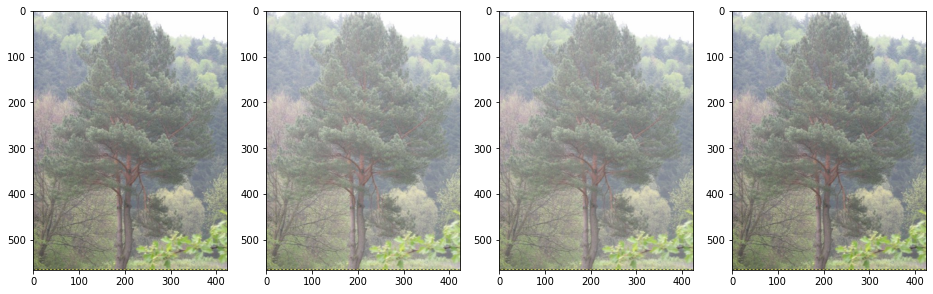

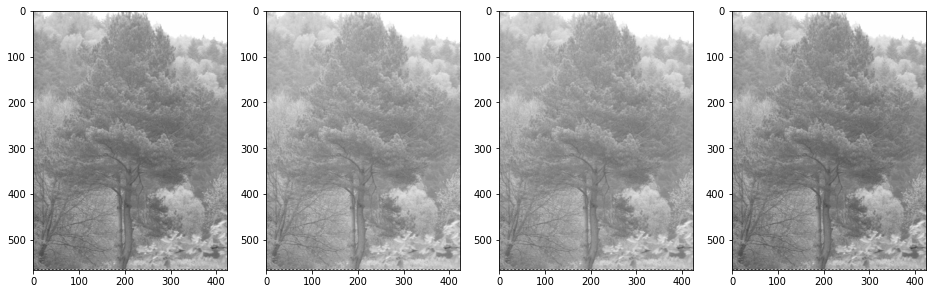

In [8]:
# Plot normalized images
plt.figure(figsize=(16,12))
plt.subplot(1, 4, 1)
plt.imshow(linear_norm(img))
plt.subplot(1, 4, 2)
plt.imshow(log_norm(img))
plt.subplot(1, 4, 3)
plt.imshow(power_norm(img, 0.8))
plt.subplot(1, 4, 4)
plt.imshow(img)

plt.figure(figsize=(16,12))
plt.subplot(1, 4, 1)
plt.imshow(linear_norm(bwimg), cmap="gray")
plt.subplot(1, 4, 2)
plt.imshow(log_norm(bwimg), cmap="gray")
plt.subplot(1, 4, 3)
plt.imshow(power_norm(bwimg, 0.8), cmap="gray")
plt.subplot(1, 4, 4)
plt.imshow(bwimg, cmap="gray")

## Zadanie 5
Narysuj histogram dla każdej z barw pierwotnie wczytanego obrazka. Czy rozkłady są równomierne?

In [9]:
# Plot histogram for every color channel
def plot_histogram(img):
    r,g,b = img[:,:,0], img[:,:,1], img[:,:,2]
    plt.figure(figsize=(16,12))
    plt.subplot(1, 3, 1)
    plt.hist(r.ravel(), bins=256, range=(0.0, 1.0), fc='r', ec='r')
    plt.subplot(1, 3, 2)
    plt.hist(g.ravel(), bins=256, range=(0.0, 1.0), fc='g', ec='g')
    plt.subplot(1, 3, 3)
    plt.hist(b.ravel(), bins=256, range=(0.0, 1.0), fc='b', ec='b')

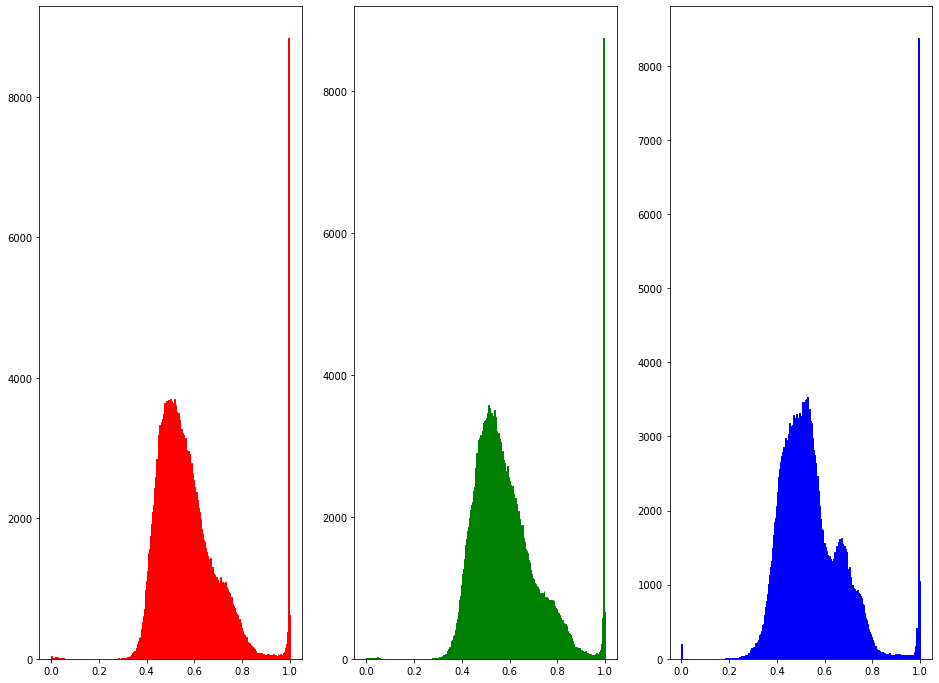

In [10]:
plot_histogram(img)

Rozkłady nie są równomierne, ale są zbliżone do rozkładów normalnych.

## Zadanie 6 (`*`)
Sprawdź w jaki sposób wyrównać histogram. Przeanalizuj nowe wyglądy histogramów. Kiedy ta operacja może być szczególnie potrzebna?


In [13]:
# Normalize histogram for every color channel
def normalize_histogram(img):
    r,g,b = img[:,:,0], img[:,:,1], img[:,:,2]
    r = np.interp(r, (r.min(), r.max()), (0, 1))
    g = np.interp(g, (g.min(), g.max()), (0, 1))
    b = np.interp(b, (b.min(), b.max()), (0, 1))
    return np.dstack((r,g,b))

# Stretch histogram for every color channel
def equalize_histogram(img):
    r,g,b = img[:,:,0], img[:,:,1], img[:,:,2]
    r = (r - np.percentile(r, 5)) / (np.percentile(r, 95) - np.percentile(r, 5))
    g = (g - np.percentile(g, 5)) / (np.percentile(g, 95) - np.percentile(g, 5))
    b = (b - np.percentile(b, 5)) / (np.percentile(b, 95) - np.percentile(b, 5))
    return np.dstack((r,g,b))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


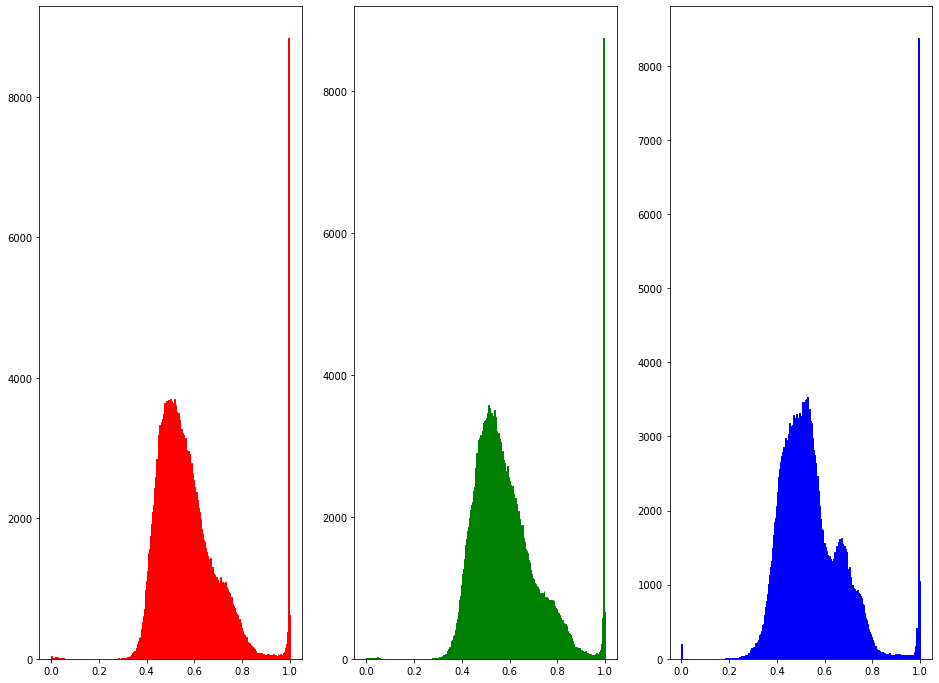

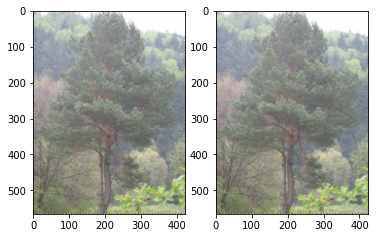

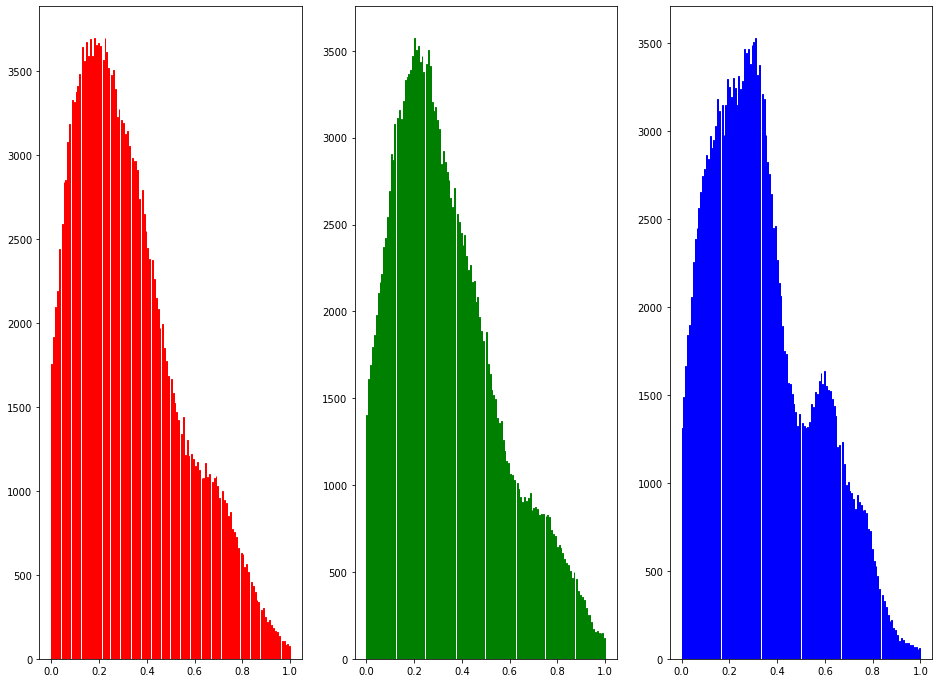

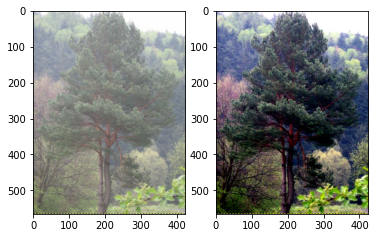

In [14]:
equalized_img = normalize_histogram(img)
plot_histogram(equalized_img)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(equalized_img)

stretch_img = equalize_histogram(img)
plot_histogram(stretch_img)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(stretch_img)

Normalizacja rozkładów nie wpłynęła na wygląd obrazu, gdyż rozkłady były wstępnie znormalizowane. Wyrównanie histogramu poprawiło kontrast obrazu.

## Zadanie 7
Za pomocą metody `rotate` z `scipy.ndimage` obróć obrazek. Sprawdź dokumentację, co będzie efektem działania? (Oryginany zmieniony obrazek, kopia obrazka, czy zostanie coś zwrócone)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


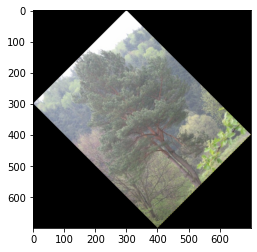

In [15]:
import scipy.ndimage as ndimage

# Rotate image. scipy.ndimage.rotate returns rotated copy of image.
angle = 45
rot_img = ndimage.rotate(img, angle)
plt.imshow(rot_img)

`scipy.ndimage.rotate` zwraca kopię obrazka obróconą o ustalony kąt.

# Zadanie 8
Wejście do sieci MLP jest jednowymiarowe, wobec czego musimy "spłaszczyć" nasz obrazek. Napisz funkcję która zwróci zwektoryzowany obrazek. Przetestuj czy działa poprawnie.

In [16]:
# Convert rgb image matrix to 1d vector
def img2vec(img):
    return img.reshape(img.shape[0]*img.shape[1]*img.shape[2])

In [17]:
test_image = np.ndarray(shape=(3,3,3), dtype=float)
vimg = img2vec(test_image)
print(np.shape(vimg))

(27,)


#### Kontynuacja w `Lab2`